In [292]:
import pandas as pd 
import numpy 

Importing the Data as a DataFrame 

In [334]:
irisData = pd.read_csv('iris.data',header = None)
irisData.columns=['sepal Length', 'sepal Width', 'petal Length', 'petal Width', 'LabelNames']

In [335]:
irisData.head()

,sepal Length,sepal Width,petal Length,petal Width,LabelNames
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


we are splitting the dataset into X and Y and making it an array so that we can do cross validation 


In [295]:
X = irisData[['sepal Length', 'sepal Width', 'petal Length', 'petal Width']]
Y =irisData.LabelNames.map({'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':-1})
X_List = X.values.tolist()
Y_List= Y.values.tolist()
X_List=np.array(X_List)
Y_List=np.array(Y_List)

# Method -1  Creating the beta value with the formula with Shuffling 

In [349]:
#Trying to find out which of the fold will be apt for more accuracy with different seed value
fold =[3,5,7]
accuracy_list=[]
accuracy_list_4=[]
seed_list=[10,50,100]
for j in seed_list:
    np.random.seed(j)
    indices = np.random.permutation(len(X_List))
    print("-----------------The shuffled indices for the given "+str(j)+" seed----------------------")
    print(indices)
    print("----------------------------------------------------------------------------------")
    #Implementing the cross validation with respect to the number of fold 
    n = len(X_List)
    for val in fold:
        len_k = n // val
        print("The prediction Accuracy for the "+str(val)+" K-fold value")
        for i in range(val):
            start = i * len_k
            end = ((i + 1) * len_k)
            print(start)
            print(end)
            #Getting the test and training values to feed to the model 
            iris_X_test  = X_List[indices[start:end]]
            iris_y_test  = Y_List[indices[start:end]]
            iris_X_train = X_List[indices[[x for x in indices if x not in indices[start:end]]]]
            iris_y_train = Y_List[indices[[x for x in indices if x not in indices[start:end]]]]
            
            #Creating the model using Linear Regression by calculating the beta
            lhs = np.dot(np.transpose(iris_X_train), iris_X_train)
            lhs_inverse = np.linalg.inv(lhs)
            rhs = np.matmul(np.transpose(iris_X_train), iris_y_train)
            beta = np.matmul(lhs_inverse, rhs)
             
            #Predicting the output for the test data set with the beta values 
            pred =numpy.row_stack( numpy.dot(iris_X_test,beta))
            pred = numpy.round(pred)
            
            #Calculating the accuracy for the given model by checking with the test data set 
            count = 0
            for i in range(len(pred)):
                if(pred[i] == iris_y_test[i]):
                    count+=1
            accuracy = count/len(pred)
            print('Accuracy = '+str(accuracy*100)+" %")
            accuracy_list.append(accuracy)
    
        avg=sum(accuracy_list)/len(accuracy_list)
        print(' The model is  = '+str(avg*100)+" % accurate")
        accuracy_list_4.append(avg*100)

-----------------The shuffled indices for the given 10 seed----------------------
[ 87 111  10  91  49  60  72  67  39  55  66 142  53   1  19 112  85  38
  21  35 102 132 126  24  61   2  95  90  76 117  58  97 129 114 146  47
 124 120 118 141  26  43  59  41  56  32  52  70 121 144  68 109  81  78
  51  14  48  63  20 137  29   3 106  98 140  37 139  45  82  83  42 143
 131 116 105 133   6  79 108  99  34 128  50  96   4   5  44  84 130 103
  75   7  46  17 104 101  71  80 110 147 149 134  74  28  11  94  23  22
 127  93  18  27  36  57  31  65  12  89 119  30  86  92 148  25 138  13
  69  77 135 136  33  62 122 107  88  54 100  16 115  40   0  73   8 145
 123 113  64  15 125   9]
----------------------------------------------------------------------------------
The prediction Accuracy for the 3 K-fold value
0
50
Accuracy = 96.0 %
50
100
Accuracy = 96.0 %
100
150
Accuracy = 100.0 %
 The model is  = 97.33333333333333 % accurate
The prediction Accuracy for the 5 K-fold value
0
30
Accur

#  Method -2  By using the Gradient Descet we are calculating the beta

-----------------The shuffled indices for the given 10 seed----------------------
[ 87 111  10  91  49  60  72  67  39  55  66 142  53   1  19 112  85  38
  21  35 102 132 126  24  61   2  95  90  76 117  58  97 129 114 146  47
 124 120 118 141  26  43  59  41  56  32  52  70 121 144  68 109  81  78
  51  14  48  63  20 137  29   3 106  98 140  37 139  45  82  83  42 143
 131 116 105 133   6  79 108  99  34 128  50  96   4   5  44  84 130 103
  75   7  46  17 104 101  71  80 110 147 149 134  74  28  11  94  23  22
 127  93  18  27  36  57  31  65  12  89 119  30  86  92 148  25 138  13
  69  77 135 136  33  62 122 107  88  54 100  16 115  40   0  73   8 145
 123 113  64  15 125   9]
----------------------------------------------------------------------------------
The prediction Accuracy for the 3 K-fold value
Accuracy = 98.0 %


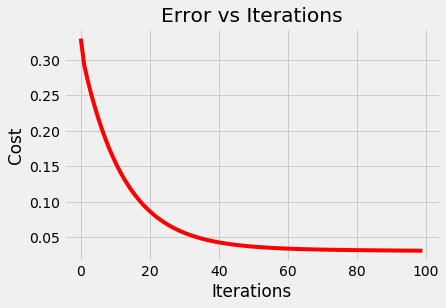

Accuracy = 98.0 %


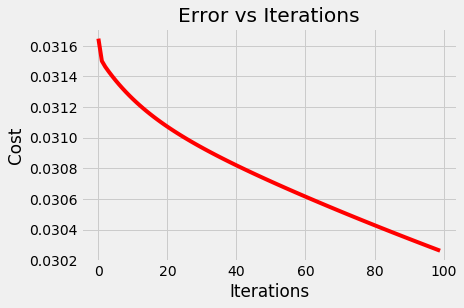

Accuracy = 100.0 %


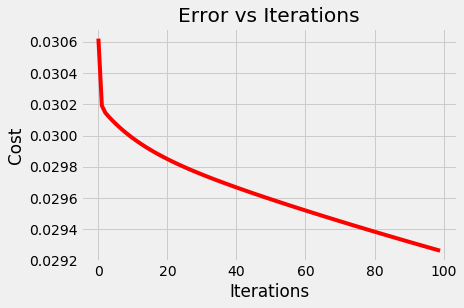

 The model is  = 98.66666666666667 % accurate
The prediction Accuracy for the 5 K-fold value
Accuracy = 96.66666666666667 %


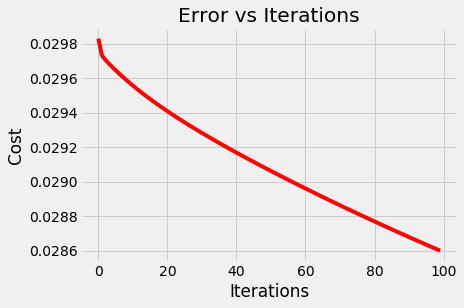

Accuracy = 96.66666666666667 %


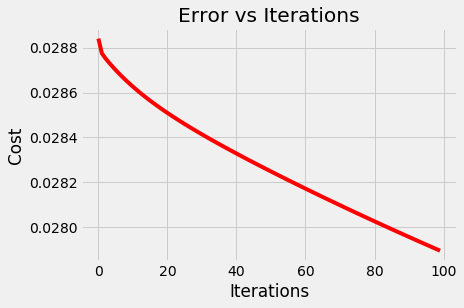

Accuracy = 96.66666666666667 %


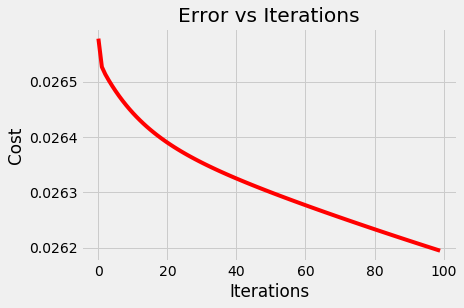

Accuracy = 100.0 %


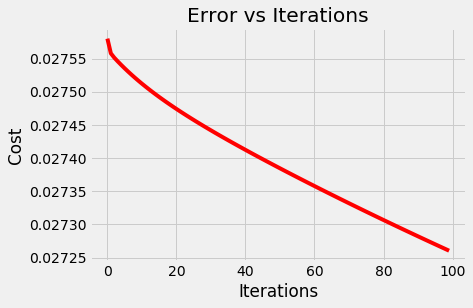

Accuracy = 100.0 %


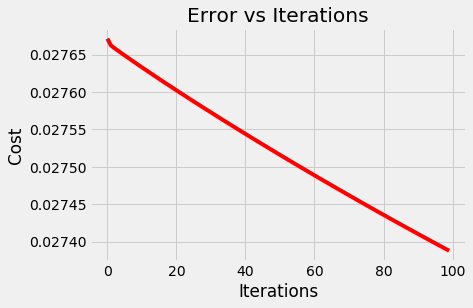

 The model is  = 98.25 % accurate
The prediction Accuracy for the 7 K-fold value
Accuracy = 100.0 %


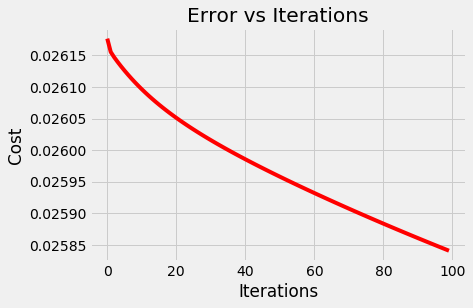

Accuracy = 100.0 %


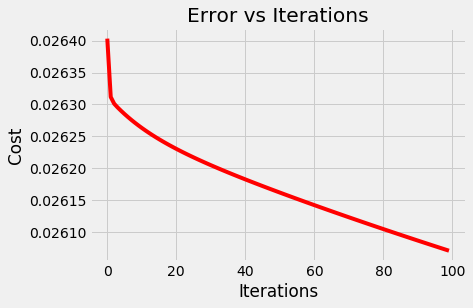

Accuracy = 95.23809523809523 %


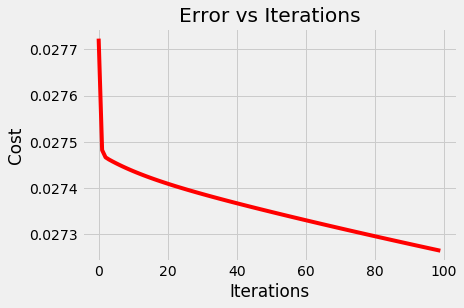

Accuracy = 90.47619047619048 %


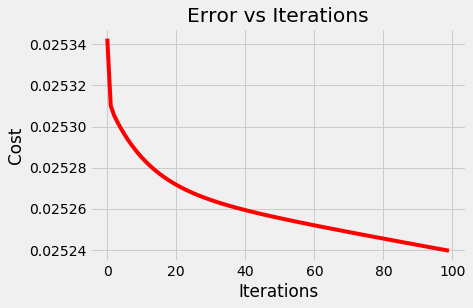

Accuracy = 95.23809523809523 %


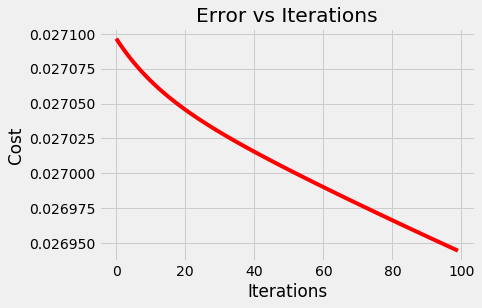

Accuracy = 100.0 %


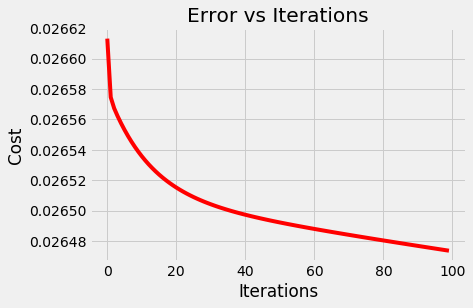

Accuracy = 100.0 %


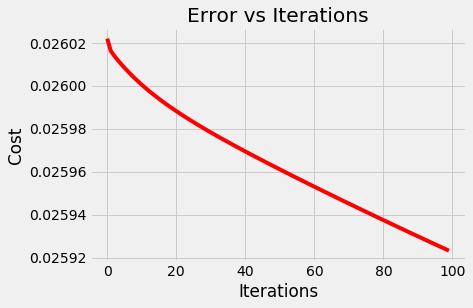

 The model is  = 97.7968253968254 % accurate
-----------------The shuffled indices for the given 50 seed----------------------
[ 88  72  20  16 147 140 113  23  12  68  39 130  34 112  55  25  82  48
  81  77 100  80  14 131  86 118  56  54  97 143 125  98  73 144  21   3
  59 119  84   7  41  57 104   8 102  17  42  18 146 114  75   5  15  63
 142  99  50  27  38 122 117  74 103  40  37 116  78   4  53  44 107 137
  65 128  69  47  87  32  89  52  29   9  61   1  83  45  90 127 129 135
  58 123  36 101  13  62  46 136  24  28 138 149 120 124  11 148  94 108
  93   0  51 110  10 126  67  96  76  66 121  60  26 115  35 105  30  79
 141  19   6  64 106  85  49  31  43 134  91  92 111  71  95   2 133  22
 145  70 132  33 109 139]
----------------------------------------------------------------------------------
The prediction Accuracy for the 3 K-fold value
Accuracy = 98.0 %


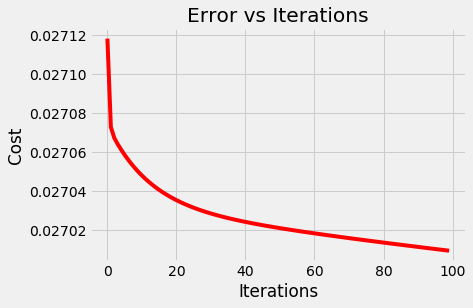

Accuracy = 98.0 %


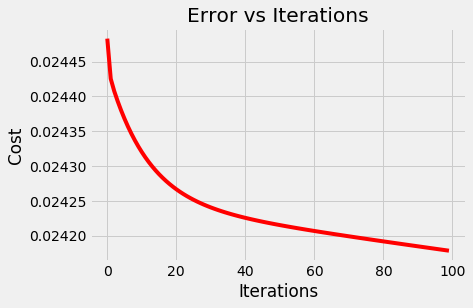

Accuracy = 96.0 %


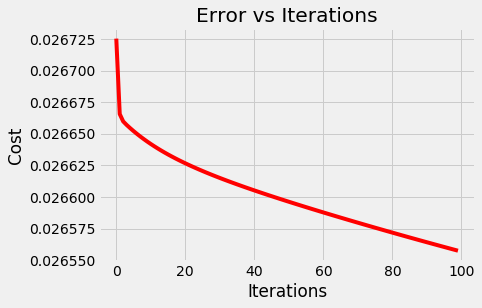

 The model is  = 97.71957671957672 % accurate
The prediction Accuracy for the 5 K-fold value
Accuracy = 100.0 %


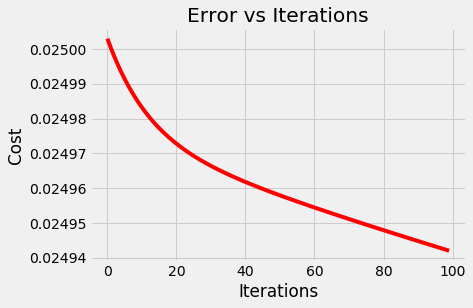

Accuracy = 96.66666666666667 %


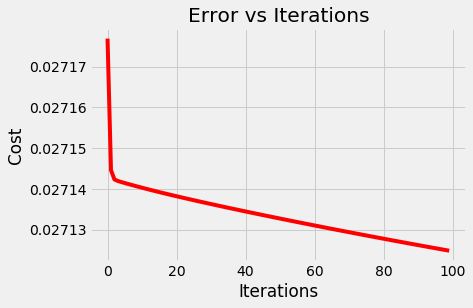

Accuracy = 93.33333333333333 %


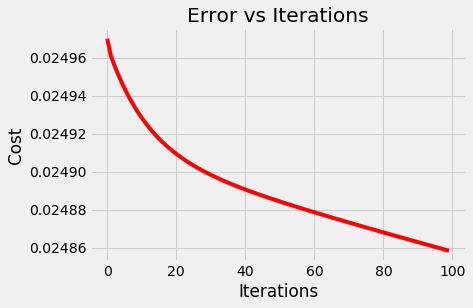

Accuracy = 100.0 %


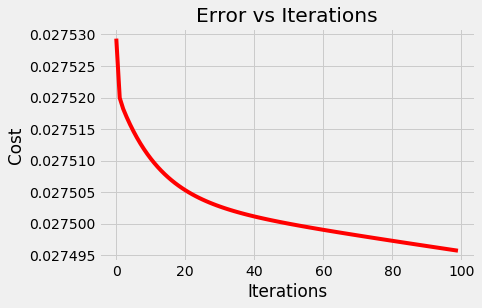

Accuracy = 93.33333333333333 %


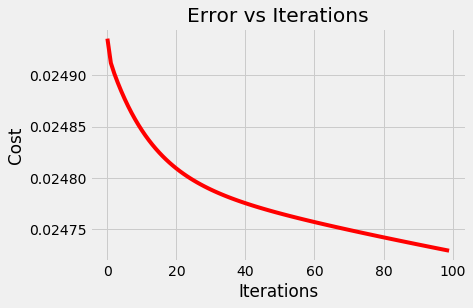

 The model is  = 97.49068322981367 % accurate
The prediction Accuracy for the 7 K-fold value
Accuracy = 100.0 %


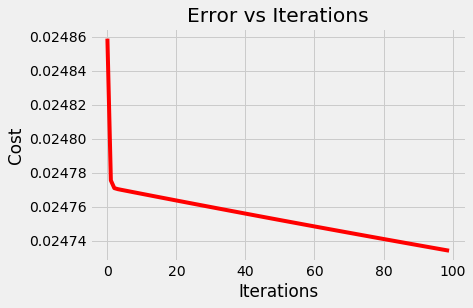

Accuracy = 95.23809523809523 %


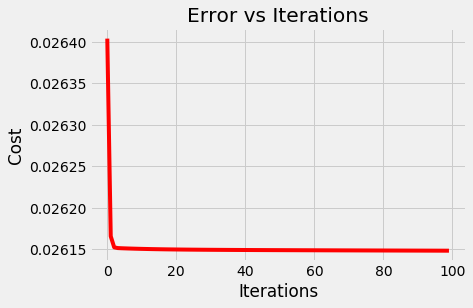

Accuracy = 100.0 %


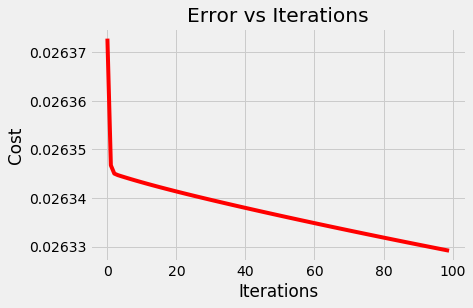

Accuracy = 100.0 %


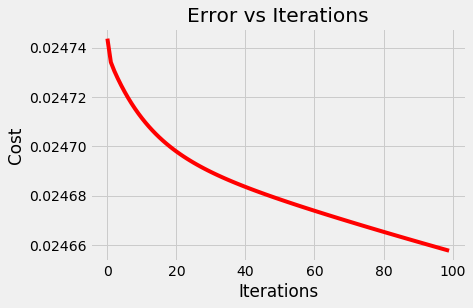

Accuracy = 90.47619047619048 %


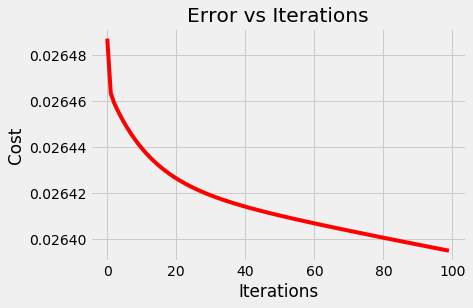

Accuracy = 100.0 %


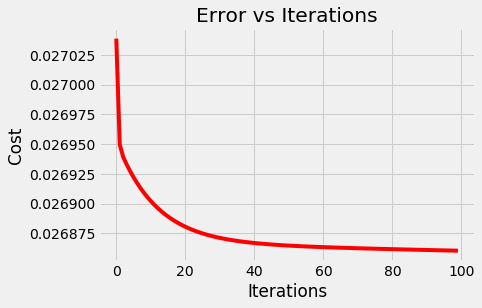

Accuracy = 90.47619047619048 %


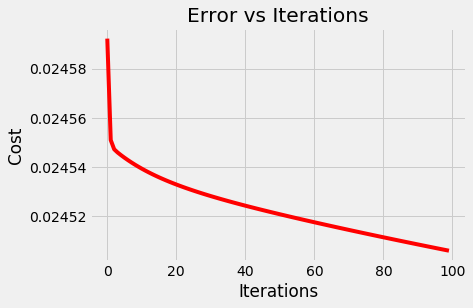

 The model is  = 97.28253968253969 % accurate
-----------------The shuffled indices for the given 100 seed----------------------
[128  11 118  15 123 135  32   1 116  45  40 115  26  28 145  97  62  77
 122 112 125  31 146  29  69 149  75  20  73 120  81  99 119  12  16  51
  46  89 136 114  41  90 102 109  37   6  25  21  92   9  23  35  54 131
 127  84 111  96 117 110  82  22 139 124 133  33  42 101   5  36  43  52
 104 144 134  10  85  70   3  76  57 126   0  78  88  83  50  68  95 132
 113  13  72  17  74 129 137 106  64  18  44  38  39 121  48  30  56  27
 140  63 141  19 142 105   2  80  71  55 143  61  65  47  49   7 147  59
  91   4 100 108 130  86  93  58  60 107 148  34  14  66  53  98  94 138
  79  87 103  67  24   8]
----------------------------------------------------------------------------------
The prediction Accuracy for the 3 K-fold value
Accuracy = 100.0 %


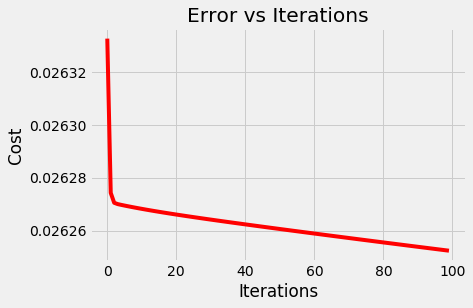

Accuracy = 90.0 %


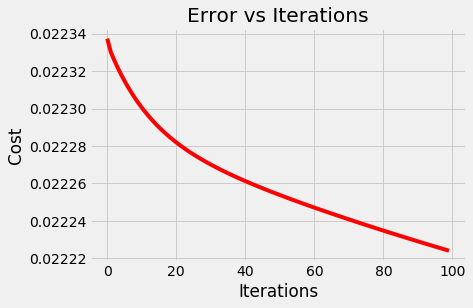

Accuracy = 100.0 %


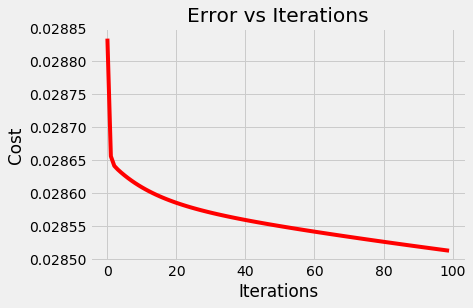

 The model is  = 97.22655122655122 % accurate
The prediction Accuracy for the 5 K-fold value
Accuracy = 100.0 %


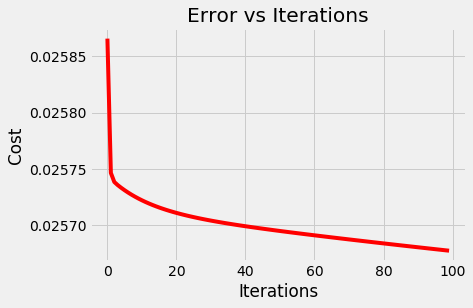

Accuracy = 96.66666666666667 %


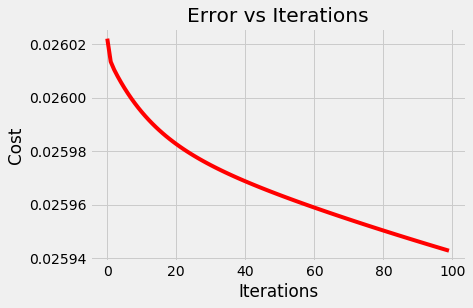

Accuracy = 90.0 %


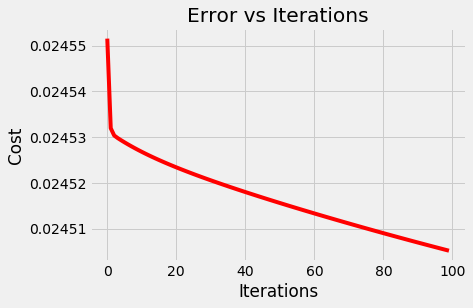

Accuracy = 96.66666666666667 %


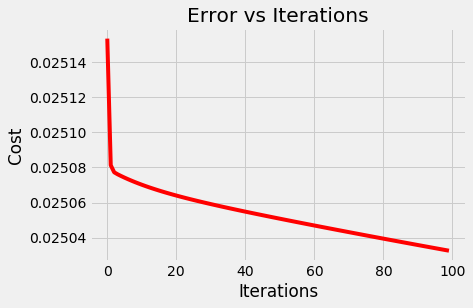

Accuracy = 100.0 %


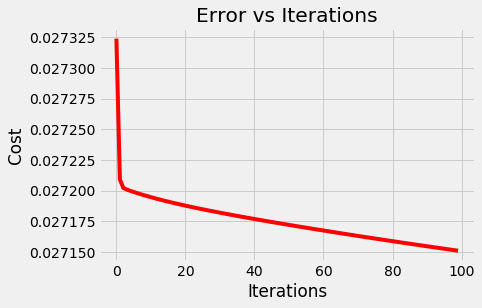

 The model is  = 97.15288220551379 % accurate
The prediction Accuracy for the 7 K-fold value
Accuracy = 100.0 %


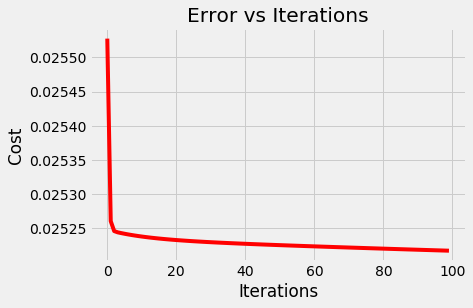

Accuracy = 100.0 %


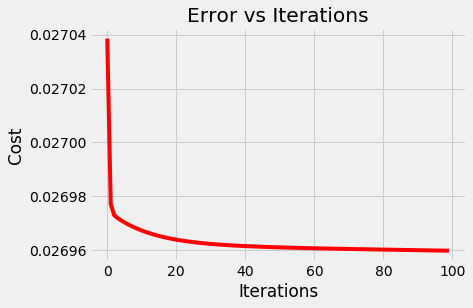

Accuracy = 95.23809523809523 %


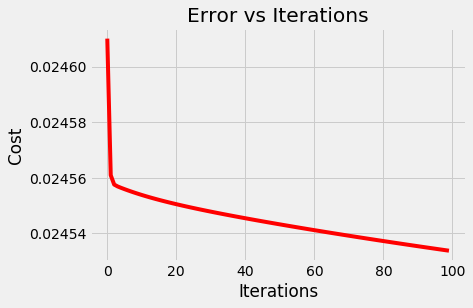

Accuracy = 90.47619047619048 %


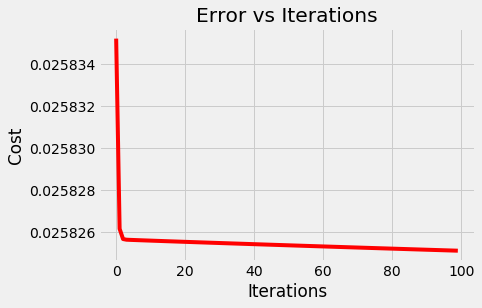

Accuracy = 90.47619047619048 %


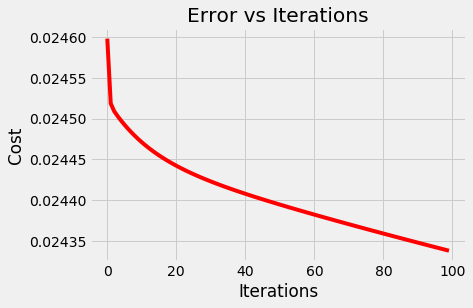

Accuracy = 100.0 %


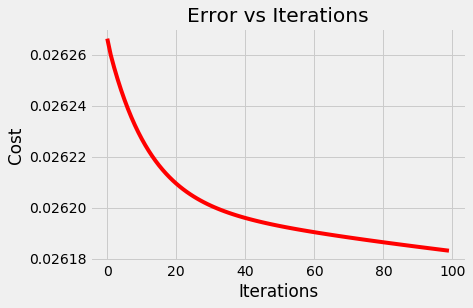

Accuracy = 100.0 %


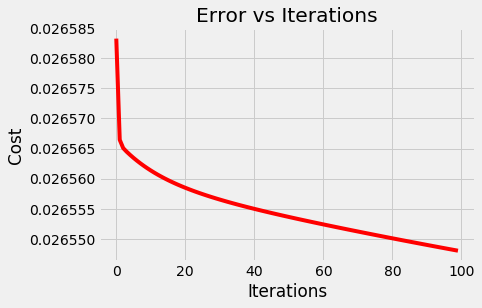

 The model is  = 97.06666666666666 % accurate


In [345]:
import matplotlib.pyplot as plt
alpha = 0.02
iterations = 100
#initializing the beta values to zero and calculating the error 
beta = np.zeros(X.shape[1])
#Trying to find out which of the fold will be apt for more accuracy with different seed value
fold =[3,5,7]

accuracy_list_2=[]
accuracy_list_3=[]
seed_list=[10,50,100]
for j in seed_list:
    np.random.seed(j)
    indices = np.random.permutation(len(X_List))
    print("-----------------The shuffled indices for the given "+str(j)+" seed----------------------")
    print(indices)
    print("----------------------------------------------------------------------------------")
     #Implementing the cross validation with respect to the number of fold 
    n = len(X_List)
    for val in fold:
        
        len_k = n // val
        print("The prediction Accuracy for the "+str(val)+" K-fold value")
        for i in range(val):
            start = i * len_k
            end = ((i + 1) * len_k)
            iris_X_test  = X_List[indices[start:end]]
            iris_y_test  = Y_List[indices[start:end]]
            iris_X_train = X_List[indices[[x for x in indices if x not in indices[start:end]]]]
            iris_y_train = Y_List[indices[[x for x in indices if x not in indices[start:end]]]]
            
            #Creating the model with Gradient Descent 
            m = iris_y_train.size
            cost_arr=[]
            for i in range(iterations):
                m = iris_y_train.size
                error = np.dot(iris_X_train, beta.T) - iris_y_train
                cost = 1/(2*m) * np.dot(error.T, error)
                cost_arr.append(cost)
                beta = beta - (alpha * (1/m) * np.dot(iris_X_train.T, error))
                
            #Predicting the output for the test data set with the beta values     
            pred =numpy.row_stack( numpy.dot(iris_X_test,beta))
            pred = numpy.round(pred)
            
            #Calculating the accuracy for the given model by checking with the test data set 
            count = 0
            for i in range(len(pred)):
                if(pred[i] == iris_y_test[i]):
                    count+=1
            accuracy = count/len(pred)
            print('Accuracy = '+str(accuracy*100)+" %")
            accuracy_list_2.append(accuracy)
            fig, ax = plt.subplots()
            ax.plot(np.arange(iterations), cost_arr, 'r')
            ax.set_xlabel('Iterations')
            ax.set_ylabel('Cost')
            ax.set_title('Error vs Iterations')
            plt.style.use('fivethirtyeight')
            plt.show()
    
        avg=sum(accuracy_list_2)/len(accuracy_list_2)
        print(' The model is  = '+str(avg*100)+" % accurate")
        accuracy_list_3.append(avg*100)

In [333]:
print("These are the accuracy of the Normal model")
print(accuracy_list_4)
print()
print("These are the accuracy of the model with Gradient Descet ")
print(accuracy_list_3)

These are the accuracy of the Normal model
[97.33333333333333, 97.33333333333334, 97.3079365079365, 97.20105820105822, 97.08488612836439, 96.97142857142858, 96.94372294372295, 96.99498746867168, 96.93333333333332, 96.87499999999999, 96.79245283018865, 96.84920634920631]

These are the accuracy of the model with Gradient Descet 
[98.66666666666667, 98.25, 97.7968253968254, 97.71957671957672, 97.49068322981367, 97.28253968253969, 97.22655122655122, 97.15288220551379, 97.06666666666666, 97.04166666666666, 97.00628930817608, 97.03809523809521]


From these accuracy change it is evident that the Gradient Descent model is having more accuracy than the other 
